In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [3]:
plt.rcParams['figure.figsize'] = [12, 10]

# $\star$ Question 2: 
Estimate the mean and covariance matrix of the dataset *gaussian.npz* via ML
estimation.

Plot the points and indicate the mean via a cross and the covariance via an
ellipse. 

Consult the matplotlib documentation to see how to draw an ellipse. 
(https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Ellipse.html)


You obtain the ellipse axes by an eigen-decomposition of the matrix (Numpy function linalg.eig). 

The scaling of the axes is given by the eigenvalues. Review the concept of an eigen-decomposition in the
internet or a math book if you lack this basic math knowledge.

# Question 2.1: Mean and Covariance estimation 
Estimate the mean and covariance matrix of the dataset, you can compare these to the built in numpy functions and see if you see a difference.

In [4]:
# Load the dataset
gaussian = np.load('../data/gaussian.npz')['arr_0']
gaussian.shape

(100, 2)

In [5]:
# Inspect the first couple of elements
gaussian[:5, :]  # each column represent a random variable, each row represents one measurement of each random variable

array([[ 2.53766714,  4.53428727],
       [ 3.83388501,  4.98176918],
       [-0.25884686, -0.30158736],
       [ 2.86217332,  3.82168409],
       [ 2.31876524,  3.74100458]])

In [6]:
# Assuming that each of the 2 axis is a separate gaussian
N, num_variables = gaussian.shape
mean_ml = np.sum(gaussian, axis=0) / N
mean_ml

array([2.12308534, 3.12168402])

In [7]:
# Mean calculated by numpy
mean = np.mean(gaussian, axis=0)
mean

array([2.12308534, 3.12168402])

In [8]:
# Set temp. variable for convenience
x = gaussian.copy()

# Covariance
cov_ml = 1 / N * np.matmul((x - mean_ml).T, (x - mean_ml))
cov_ml

array([[1.33765954, 2.0820358 ],
       [2.0820358 , 3.98639368]])

In [9]:
# Covariance corrected
cov_ml_unbiased = cov_ml * N / (N - 1)
cov_ml_unbiased

array([[1.35117126, 2.10306646],
       [2.10306646, 4.02666029]])

In [10]:
# Covariance calculated by numpy
cov_matrix = np.cov(gaussian, rowvar=False)
cov_matrix

array([[1.35117126, 2.10306646],
       [2.10306646, 4.02666029]])

In [11]:
lambd, u = np.linalg.eig(cov_ml_unbiased)

# Take the square root of lambd and print axes of ellipsis
lambd = lambd ** 0.5
lambd

array([0.44321248, 2.27626761])

# Question 2.2: Plotting the graph
Plot the points and indicate the mean via a cross and the covariance via an
ellipse

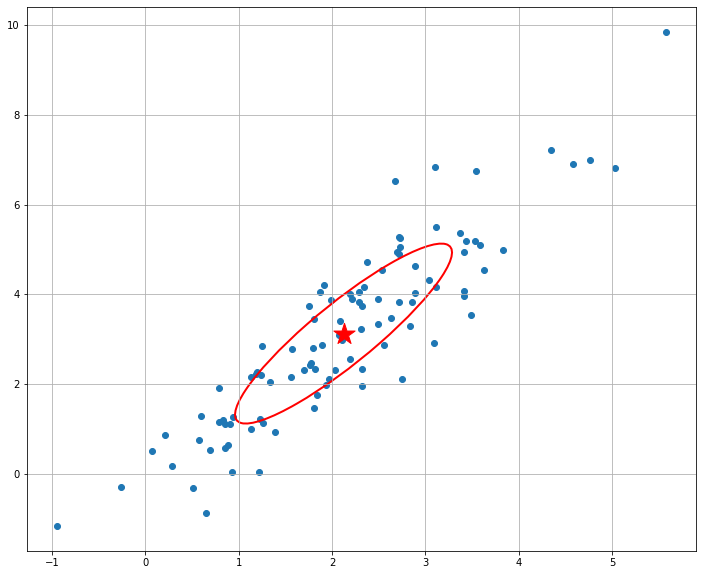

In [12]:
fig, ax = plt.subplots(figsize=(12, 10))

_ = ax.scatter(x[:, 0], x[:, 1])
_ = ax.scatter(mean_ml[0], mean_ml[1], marker="*", color="red", s=500)
ellipse = Ellipse((mean_ml[0], mean_ml[1]), 2 * lambd[0], 2 * lambd[1], 
                  np.rad2deg(np.arccos(u[0, 0])),
                  edgecolor='red', lw=2, facecolor='none')
_ = ax.grid()
_ = ax.add_patch(ellipse)

# $\star\star$ Question 3:
Create reduced datasets by considering only the first 2, 5, 10 points and estimate the mean via MAP. 

Use the ML estimate of the covariance $ \Sigma $ <sub>**ML,100**</sub> (estimated from all 100 points) as known covariance. 

Assume the conjugate prior with $\mu_0 = (2,3)^T $ and covariance $\Sigma_0 =\Sigma $ <sub>**ML,100**</sub>


Draw the ML and the MAP estimates into the point clouds (the covariance is the same as it is assumed to be known here). 

How reliable is the ML estimate when there are only few measurements? 

Now work with a slightly wrong prior $\mu_0 = (2,5)^T $
and see how the effect of the prior is reduced as more measurements come
in.

# Question 3.1: Using the correct prior
Using   $\mu_0 = (2,3)^T $



In [58]:
# Reduced datasets
x_2 = x[:2, :].copy()
x_5 = x[:5, :].copy()
x_10 = x[:10, :].copy()

# Initial mean (2, 3)
m_0 = np.array([2, 3]).T

# Intialial covariance
cov_0 = cov_ml.copy()

In [59]:
def map_estimate(points, m_0, cov_0):
    # Using the formulas 211 and 212 from here: https://www.cs.ubc.ca/~murphyk/Papers/bayesGauss.pdf
    # and assuming cov_0 = cov
    n_points = points.shape[0]
    
    # Inverse once and use later
    cov_inv = np.linalg.inv(cov_0)
    
    # Calculate covariance based on MAP
    cov_map = np.linalg.inv(cov_inv + n_points * cov_inv)
    
    # Calculate second term of mean MAP for convenience
    temp = n_points * np.matmul(cov_inv, np.mean(points, axis=0)) + np.matmul(cov_inv, m_0)
    
    # Calculate mean based on MAP
    mean_map = np.matmul(cov_map, temp)

    print("For {} datapoints\nmean: {}, \ncovariance: {}\n\n".format(n_points, mean_map, cov_map))
    return mean_map, cov_map

mean_map_2, cov_map_2 = map_estimate(x_2, m_0, cov_0)
mean_map_5, cov_map_5 = map_estimate(x_5, m_0, cov_0)
mean_map_10, cov_map_10 = map_estimate(x_10, m_0, cov_0)

For 2 datapoints
mean: [2.79051738 4.17201882], 
covariance: [[0.44588651 0.69401193]
 [0.69401193 1.32879789]]


For 5 datapoints
mean: [2.21560731 3.29619296], 
covariance: [[0.22294326 0.34700597]
 [0.34700597 0.66439895]]


For 10 datapoints
mean: [2.56752927 4.00546172], 
covariance: [[0.12160541 0.18927598]
 [0.18927598 0.36239943]]




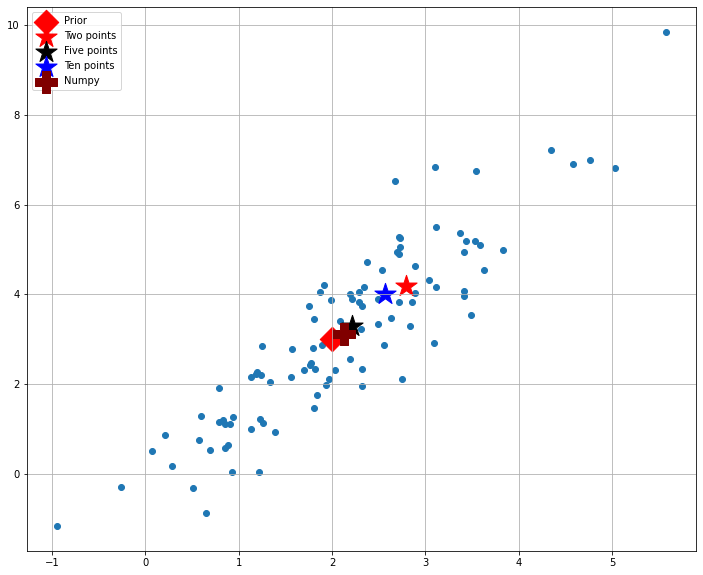

In [60]:
# Plot results
fig, ax = plt.subplots(figsize=(12, 10))

_ = ax.scatter(x[:, 0], x[:, 1])
# Add mean markers
_ = ax.scatter(m_0[0], m_0[1], marker="D", color="red", s=300, label="Prior")
_ = ax.scatter(mean_map_2[0], mean_map_2[1], marker="*", color="red", s=500, label="Two points")
_ = ax.scatter(mean_map_5[0], mean_map_5[1], marker="*", color="black", s=500, label="Five points")
_ = ax.scatter(mean_map_10[0], mean_map_10[1], marker="*", color="blue", s=500, label="Ten points")


# Actual numpy mean using 100 points
mean_np = np.mean(x, axis=0)
_ = ax.scatter(mean_np[0], mean_np[1], marker="P", color="maroon", s=500, label="Numpy")

# Add grid and legend
_ = ax.legend()
_ = ax.grid()

# Question 3.2: Using a slightly wrong prior
Using $\mu_0 = (2,5)^T $

For 2 datapoints
mean: [2.79051738 4.83868548], 
covariance: [[0.44588651 0.69401193]
 [0.69401193 1.32879789]]


For 5 datapoints
mean: [2.21560731 3.62952629], 
covariance: [[0.22294326 0.34700597]
 [0.34700597 0.66439895]]


For 10 datapoints
mean: [2.56752927 4.1872799 ], 
covariance: [[0.12160541 0.18927598]
 [0.18927598 0.36239943]]




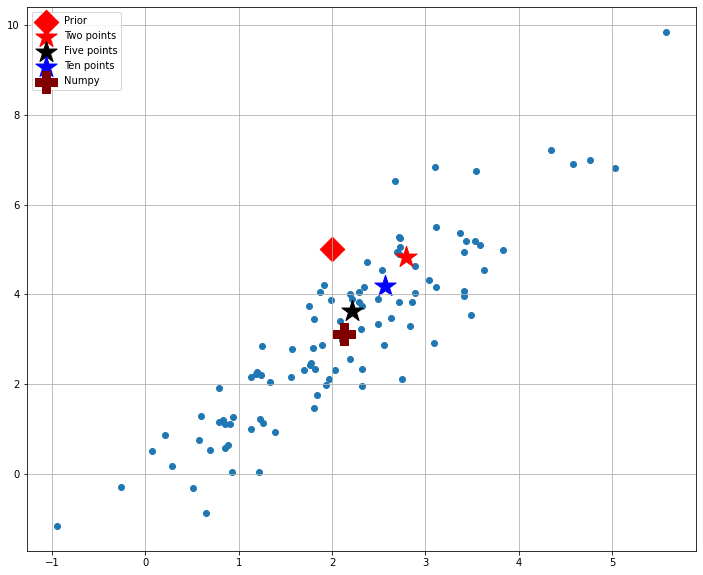

In [61]:
# Change initial mean (2, 5)
m_0 = np.array([2, 5]).T

mean_map_2, cov_map_2 = map_estimate(x_2, m_0, cov_0)
mean_map_5, cov_map_5 = map_estimate(x_5, m_0, cov_0)
mean_map_10, cov_map_10 = map_estimate(x_10, m_0, cov_0)

# Plot results
fig, ax = plt.subplots(figsize=(12, 10))

_ = ax.scatter(x[:, 0], x[:, 1])
# Add mean markers
_ = ax.scatter(m_0[0], m_0[1], marker="D", color="red", s=300, label="Prior")
_ = ax.scatter(mean_map_2[0], mean_map_2[1], marker="*", color="red", s=500, label="Two points")
_ = ax.scatter(mean_map_5[0], mean_map_5[1], marker="*", color="black", s=500, label="Five points")
_ = ax.scatter(mean_map_10[0], mean_map_10[1], marker="*", color="blue", s=500, label="Ten points")


# Actual numpy mean using 100 points
mean_np = np.mean(x, axis=0)
_ = ax.scatter(mean_np[0], mean_np[1], marker="P", color="maroon", s=500, label="Numpy")

# Add grid and legend
_ = ax.legend()
_ = ax.grid()

# $\star$ Question 4:
Estimate mean and covariance of the dataset *gaussianplus.npz* using ML and show
the result. How well does the estimate reflect the true data?